In [27]:
import pandas as pd
import os

In [28]:
cd C:\Users\HP Folio\Desktop\DATA SCIENCE\HAKATON\ANGIELSKIE\Pandas-Data-Science-Tasks-master\SalesAnalysis

C:\Users\HP Folio\Desktop\DATA SCIENCE\HAKATON\ANGIELSKIE\Pandas-Data-Science-Tasks-master\SalesAnalysis


In [29]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


merging 12 files in one - "all.csv"

In [30]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir("./Sales_Data")]
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all.csv", index = False)


# cd /Desktop



In [31]:
all_data = pd.read_csv("all.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [32]:
# Info o typach danych w kolumnach
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data cleaning

In [33]:
#"znajdowanie danych z NaN w wierszach
nan_df = all_data[all_data.isna().any(axis = 1)] 
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Usuwanie danych NaN z danych
all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Dodawanie kolumny i rozdzielanie danych w kolumnach

In [35]:
#zmiana , dodanie kolumny month  i wyciągnięcie miesiąca do niej
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data.head()                             
                             


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


chcemy zamienić month 04 na 4 ale jest problem z wartością "or"

In [42]:
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

# konwertowanie kolumny na dane odpowiedniego typu


In [41]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

ValueError: Unable to parse string "Quantity Ordered" at position 517

znajdowanie wartości "or" w kolumnie Order Date i usunięcie jej

In [43]:
temp_all_data = all_data[all_data["Order Date"].str[0:2] =="Or"]
temp_all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [44]:
all_data = all_data[all_data["Order Date"].str[0:2] !="Or"]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [45]:
# i teraz możemy mieć miesiące w postaci int32 (=4)
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [46]:
# alternatywna metoda dodania kolumn 
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

KeyboardInterrupt: 

In [ ]:
# dodanie/wyodrębnienie nazwy miasta z kolumny Purchase Address

In [53]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
all_data.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


# Data Exploration!

### usuwanie kolumny:   del df["nazwa_kolumny"]


In [ ]:
usunąć kolumne można też poleceniem drop
data_all = data_all.drop(columns = "Nazwa_kolumny") # nie ma nic po drop nawet kropki

ZADANIE 1 

 What was the best month for sales? 
 How much was earned that month?

In [47]:
# konwertujemy dane w kolumnach do własciwych typów
all_data['Sales'] = all_data["Quantity Ordered"].astype(int) * all_data["Price Each"].astype(float)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [110]:
results = all_data.groupby(['Month']).sum()
results

,Sales
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


## Rysowanie wykresu


In [49]:
from matplotlib import pyplot  as plt

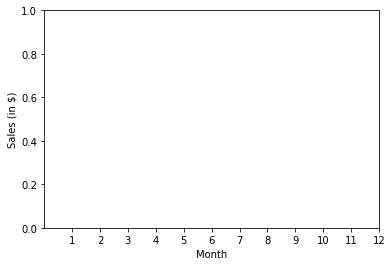

In [50]:
months = range(1, 13)

plt.xticks(months)

plt.xlabel("Month")
plt.ylabel("Sales (in $)") 
plt.show()

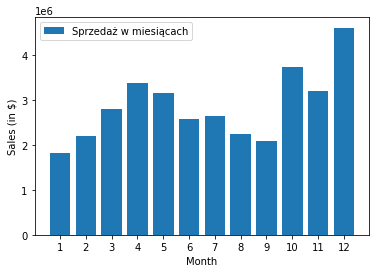

In [108]:
results = all_data.groupby(['Month']).sum()

plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales (in $)")

plt.bar(months, results["Sales"])
plt.legend(["Sprzedaż w miesiącach"])
plt.show()

Jakie miasto miało najwyższą sprzedaż ?

In [ ]:
ponieważ nazwy miast mogą być takie same w różnych stanach ,
musimy wziąść oprócz nazwy także nazwę stanu
Nazwe miasta i stanu wyodrębnimy tym razem za pomocą funkcji get i funkcji lambda

In [95]:

all_data = all_data.drop(columns = "City_State")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [98]:
def get_city(adres):
    return adres.split(",")[1]

def get_stan(adres):
    return adres.split(",")[2].split(" ")[1]

all_data["City_State"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_stan(x)})") 
all_data.head()                                                            

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [121]:
results = all_data.groupby("City_State").sum()
results

,Month,Sales
City_State,,
Atlanta (GA),104794,2.795499e+06
Austin (TX),69829,1.819582e+06
Boston (MA),141112,3.661642e+06
Dallas (TX),104620,2.767975e+06
Los Angeles (CA),208325,5.452571e+06
New York City (NY),175741,4.664317e+06
Portland (ME),17144,4.497583e+05
Portland (OR),70621,1.870732e+06
San Francisco (CA),315520,8.262204e+06


In [140]:
miasta = all_data["City_State"].unique()

print(miasta)

[' Dallas (TX)' ' Boston (MA)' ' Los Angeles (CA)' ' San Francisco (CA)'
 ' Seattle (WA)' ' Atlanta (GA)' ' New York City (NY)' ' Portland (OR)'
 ' Austin (TX)' ' Portland (ME)']


ConversionError: Failed to convert value(s) to axis units: ' Dallas (TX) Boston (MA) Los Angeles (CA) San Francisco (CA) Seattle (WA) Atlanta (GA) New York City (NY) Portland (OR) Austin (TX) Portland (ME)'

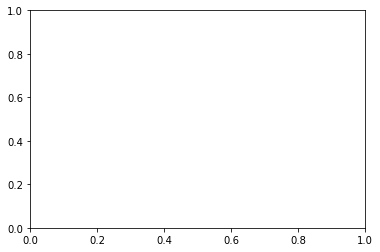

In [142]:

miasta = str(' Dallas (TX)' ' Boston (MA)' ' Los Angeles (CA)' ' San Francisco (CA)'
 ' Seattle (WA)' ' Atlanta (GA)' ' New York City (NY)' ' Portland (OR)'
 ' Austin (TX)' ' Portland (ME)')
plt.xticks(miasta)
plt.xlabel("Miasta")
plt.ylabel("Sales (in $)")


plt.legend(["Sprzedaż w miastach"])
plt.show()

In [136]:
import matplotlib.pyplot as plt

keys = [city for city, df in miasta] #  uhm

plt.bar(keys,miasta.sum())
plt.ylabel('Sales in USD ($)')
plt.xlabel('Miasta')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

ValueError: too many values to unpack (expected 2)